In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import datetime
import seaborn as sns

In [3]:
df_songs = pd.read_csv("songs_normalize.csv")

In [4]:
df_songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
df_songs.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


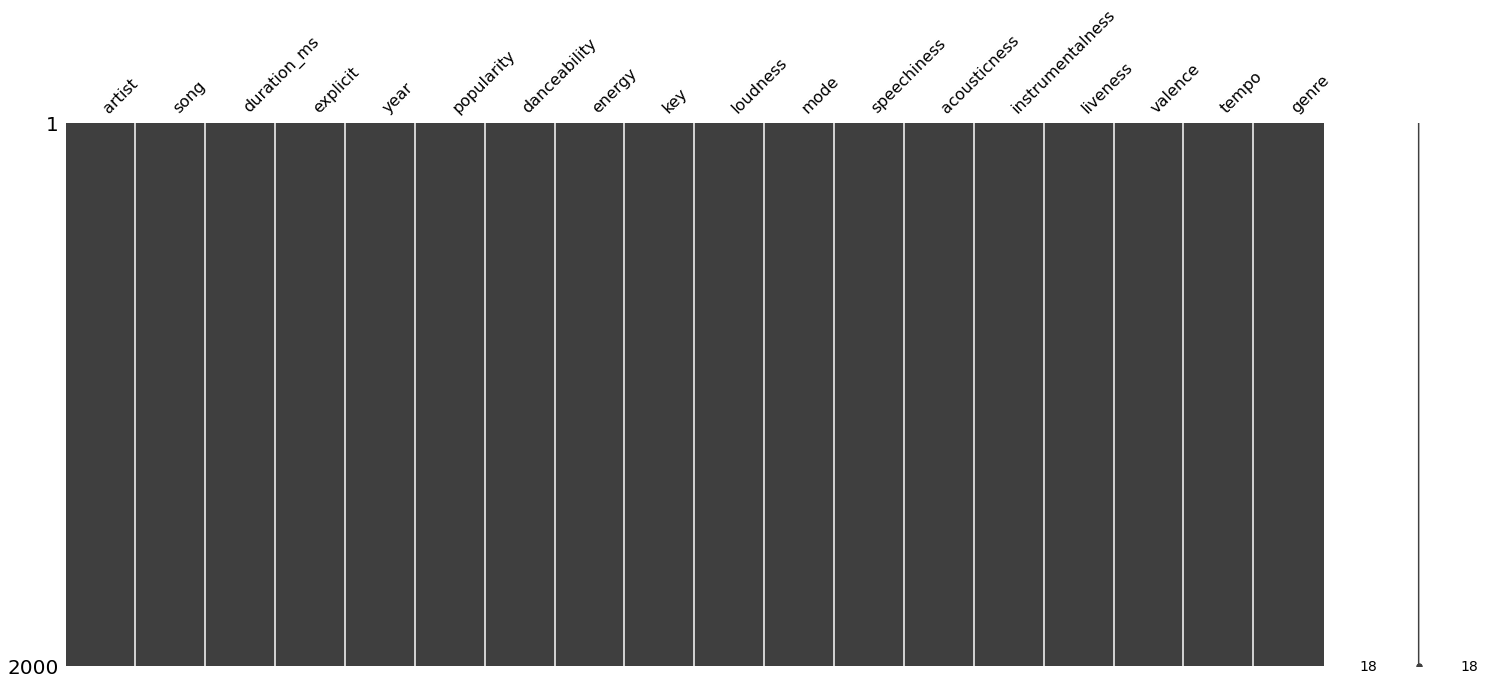

In [6]:
msno.matrix(df_songs)
plt.show()

In [7]:
df_songs.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [8]:
df_songs.describe().style.background_gradient(cmap = 'gnuplot')

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.494000,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.859960,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.000000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.000000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.000000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [9]:
df_songs['explicit'].value_counts()

False    1449
True      551
Name: explicit, dtype: int64

In [10]:
df_songs['genre'].apply(lambda x : x.split(','))

0                     [pop]
1              [rock,  pop]
2           [pop,  country]
3            [rock,  metal]
4                     [pop]
               ...         
1995                  [pop]
1996                  [pop]
1997    [hip hop,  country]
1998                  [pop]
1999              [hip hop]
Name: genre, Length: 2000, dtype: object

In [11]:
df_songs['genre'].apply(lambda x : x.split(',')).sum()

['pop',
 'rock',
 ' pop',
 'pop',
 ' country',
 'rock',
 ' metal',
 'pop',
 'hip hop',
 ' pop',
 ' R&B',
 'hip hop',
 'pop',
 ' rock',
 'pop',
 ' R&B',
 'Dance/Electronic',
 'pop',
 'pop',
 'pop',
 'rock',
 ' pop',
 'pop',
 ' Dance/Electronic',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 'pop',
 'pop',
 'hip hop',
 'rock',
 ' metal',
 'rock',
 ' Folk/Acoustic',
 ' easy listening',
 'pop',
 'hip hop',
 'pop',
 ' Dance/Electronic',
 'metal',
 'pop',
 ' Dance/Electronic',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 ' Dance/Electronic',
 'Dance/Electronic',
 'hip hop',
 ' pop',
 'pop',
 ' R&B',
 'pop',
 'R&B',
 'pop',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 ' Dance/Electronic',
 'hip hop',
 'pop',
 ' country',
 'pop',
 ' R&B',
 'pop',
 ' latin',
 'pop',
 ' R&B',
 'hip hop',
 ' pop',
 ' R&B',
 'hip hop',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 'pop',
 'pop',
 ' R&B',
 'R&B',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 ' R&B',
 'pop',
 ' latin',
 'hip hop',
 ' pop',
 ' R&B',
 'hip hop',
 ' pop',
 ' R&B',
 'h

In [109]:
genre_list = df_songs['genre'].apply(lambda x : x.split(',')).sum()
genre_count = Counter(genre_list).most_common()
df_genre_count = pd.DataFrame(genre_count)
df_genre_count.columns = ['genre_name', 'count']
df_genre_count.head(10)
df_genre_complete = pd.concat([df_songs, df_genre_count])

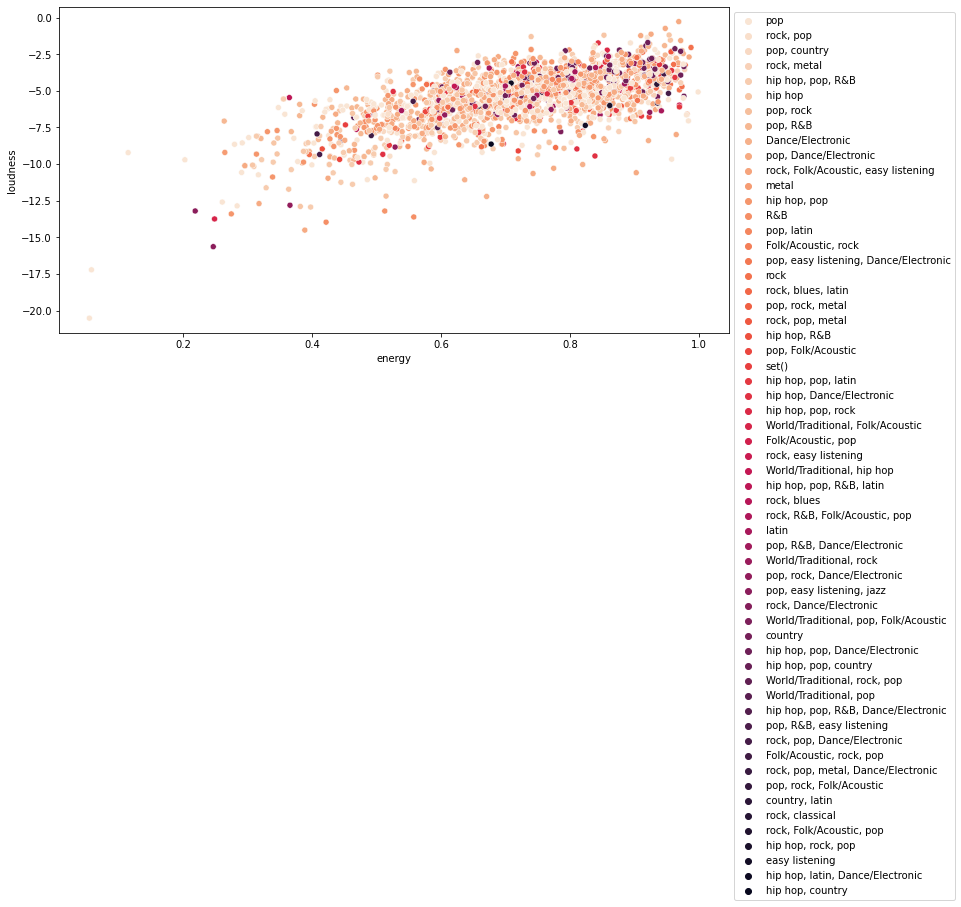

In [77]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_songs, x='energy', y='loudness', hue='genre', palette='rocket_r')
plt.legend(bbox_to_anchor=(1,1));

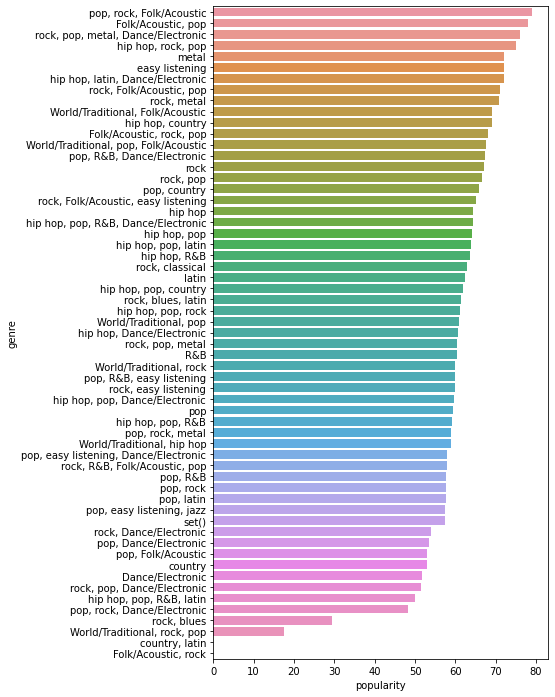

In [79]:
plt.figure(figsize = (6,12))
popularity_genre = df_songs.groupby('genre').mean().sort_values('popularity', ascending=False)
sns.barplot(data = popularity_genre,y =popularity_genre.index, x = 'popularity', orient='h')
plt.show()

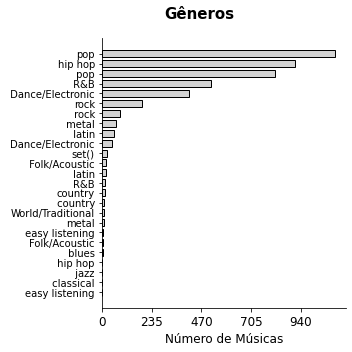

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

xtichlabels = 0, 235, 470, 705, 940

ax.barh(df_genre_count.sort_values(by='count')['genre_name'],
        df_genre_count.sort_values(by='count')['count'],
        color='lightgray', edgecolor='black', linewidth=1, height=0.7
       )

# Escondendo spines de cima e da direita
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
    
# X axis
ax.set_xlabel("Número de Músicas", fontsize=12, fontweight='medium')
ax.set_xticklabels(xtichlabels, fontsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)

# Título
ax.set_title('Gêneros', fontsize=15, fontweight='bold', x=0.4, y=1.05)

plt.xlim(0,980)
plt.tight_layout()
plt.show()

In [22]:
values = df_songs['explicit'].value_counts()
keys = df_songs['explicit'].unique()
print(keys)


[False  True]


In [25]:
fig = go.Figure(go.Pie(values= values, labels = keys, hole = 0.3))
fig.show()

In [29]:
fig = go.Figure(px.pie(values= values, labels = keys))
fig.show()

In [ ]:
#Explicit por genero

In [32]:
#Autoria
artist_list = df_songs['artist'].apply(lambda x : x.split(',')).sum()
artist_count = Counter(artist_list).most_common()
df_artist_count = pd.DataFrame(artist_count)
df_artist_count.columns = ['artist_name', 'count']
df_artist_count.head(10)

,artist_name,count
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Kanye West,17
7,Chris Brown,17
8,Beyoncé,16
9,Katy Perry,16


In [33]:
df_artist_top_10 = df_artist_count.iloc[0:10,:]
df_artist_top_10

,artist_name,count
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Kanye West,17
7,Chris Brown,17
8,Beyoncé,16
9,Katy Perry,16


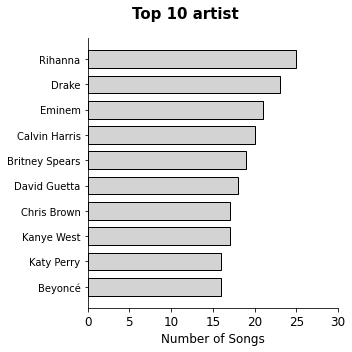

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

xtichlabels = 0, 5, 10, 15, 20, 25, 30

ax.barh(df_artist_top_10.sort_values(by='count')['artist_name'],
        df_artist_top_10.sort_values(by='count')['count'],
        color='lightgray', edgecolor='black', linewidth=1, height=0.7
       )

# Esconde a grade
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
    
# X axis
ax.set_xlabel("Number of Songs", fontsize=12, fontweight='medium')
ax.set_xticklabels(xtichlabels, fontsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)

# Title
ax.set_title('Top 10 artist ', fontsize=15, fontweight='bold', x=0.4, y=1.05)

plt.xlim(0,30)
plt.tight_layout()
plt.show()

In [83]:
print(df_genre_count)

           genre_name  count
0                 pop    936
1             hip hop    776
2                 pop    697
3                 R&B    439
4    Dance/Electronic    349
5                rock    162
6                rock     72
7               metal     57
8               latin     49
9    Dance/Electronic     41
10              set()     22
11      Folk/Acoustic     16
12              latin     15
13                R&B     13
14            country     11
15            country     10
16  World/Traditional     10
17              metal      9
18     easy listening      6
19      Folk/Acoustic      4
20              blues      4
21            hip hop      2
22               jazz      2
23          classical      1
24     easy listening      1


In [ ]:
## Atributos ao longo dos anos

In [44]:
year_mean = df_songs[['danceability','energy','acousticness', 'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()
year_mean.head()

,year,danceability,energy,acousticness,valence
0,1998,0.727000,0.445000,0.339000,0.527000
1,1999,0.668974,0.738421,0.143688,0.574008
2,2000,0.689824,0.748257,0.118339,0.647973
3,2001,0.674130,0.724631,0.145060,0.661041
4,2002,0.675244,0.722567,0.144033,0.575156


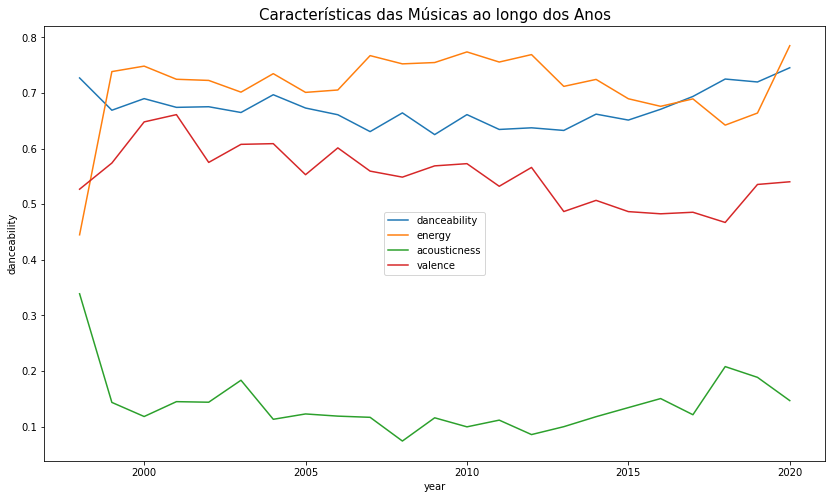

In [45]:
plt.figure(figsize=(14,8))
plt.title("Características das Músicas ao longo dos Anos", fontsize=15)
linhas = ['danceability','energy','acousticness','valence']

for linha in linhas:
    ax = sns.lineplot(x='year', y=linha, data=year_mean)
    
plt.legend(linhas)

In [85]:
freq_artists = df_songs.artist.value_counts().nlargest(20)

#Criamos um subconjunto do df_songs com os 20 artistas mais frequentes
freq_artists_d = df_songs[df_songs.artist.isin(list(freq_artists.index))]

In [41]:
art_nsongs_pop = pd.DataFrame({'n_songs':freq_artists, 'popularity':freq_artists_d.groupby('artist').mean().popularity})
print(art_nsongs_pop) 


                   n_songs  popularity
Ariana Grande           14   54.214286
Beyoncé                 16   64.375000
Black Eyed Peas         14   65.500000
Britney Spears          19   63.052632
Bruno Mars              12   78.166667
Calvin Harris           20   67.800000
Chris Brown             17   63.529412
Coldplay                13   75.307692
David Guetta            18   65.833333
Drake                   23   61.913043
Eminem                  21   72.333333
JAY-Z                   12   67.750000
Jason Derulo            13   63.384615
Justin Timberlake       12   70.583333
Kanye West              17   61.705882
Katy Perry              16   64.562500
Maroon 5                13   55.769231
P!nk                    15   52.266667
Rihanna                 25   72.120000
Taylor Swift            16   70.312500


In [47]:
#freq_artists_d.groupby('artist').popularity.mean()

artist
Ariana Grande        54.214286
Beyoncé              64.375000
Black Eyed Peas      65.500000
Britney Spears       63.052632
Bruno Mars           78.166667
Calvin Harris        67.800000
Chris Brown          63.529412
Coldplay             75.307692
David Guetta         65.833333
Drake                61.913043
Eminem               72.333333
JAY-Z                67.750000
Jason Derulo         63.384615
Justin Timberlake    70.583333
Kanye West           61.705882
Katy Perry           64.562500
Maroon 5             55.769231
P!nk                 52.266667
Rihanna              72.120000
Taylor Swift         70.312500
Name: popularity, dtype: float64

In [86]:
art_nsongs_pop = art_nsongs_pop.sort_values('n_songs')

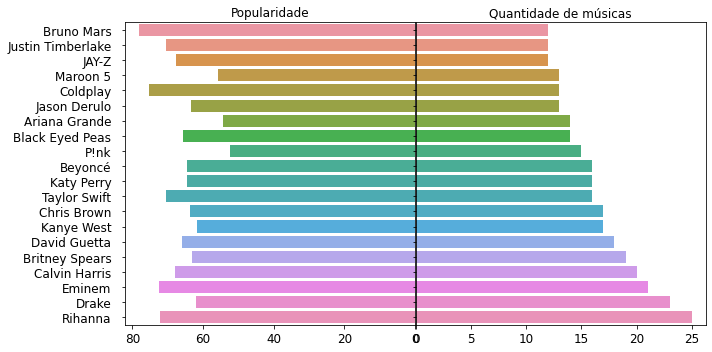

In [96]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.barplot(data = art_nsongs_pop, y = art_nsongs_pop.index, x ='popularity', orient='h', ax = axes[0])
axes[0].set_title('Popularidade',fontsize = 12)
axes[0].tick_params(axis='y', pad=10,labelsize =12)
axes[0].tick_params(axis='x',labelsize =12)
axes[0].set_xlabel('')
axes[0].invert_xaxis()

sns.barplot(data = art_nsongs_pop, y = art_nsongs_pop.index, x ='n_songs', orient='h', ax = axes[1])
axes[1].set_title('Quantidade de músicas',fontsize = 12)
axes[1].tick_params(axis='y', pad=10,labelsize =12)
axes[1].tick_params(axis='x',labelsize =12)
axes[1].set_xlabel('')
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.003)

In [51]:
artist_list = df_songs.artist.value_counts().index[:5]
df_songs.artist.value_counts()[:5]
df_artist = df_songs[df_songs.artist.isin(artist_list)][['artist','year','energy']].groupby(['artist','year']).count().reset_index()
df_artist.rename(columns={'energy':'song_count'}, inplace=True)
df_artist.head()


,artist,year,song_count
0,Britney Spears,1999,1
1,Britney Spears,2000,2
2,Britney Spears,2001,3
3,Britney Spears,2003,3
4,Britney Spears,2004,1


<AxesSubplot:xlabel='year', ylabel='song_count'>

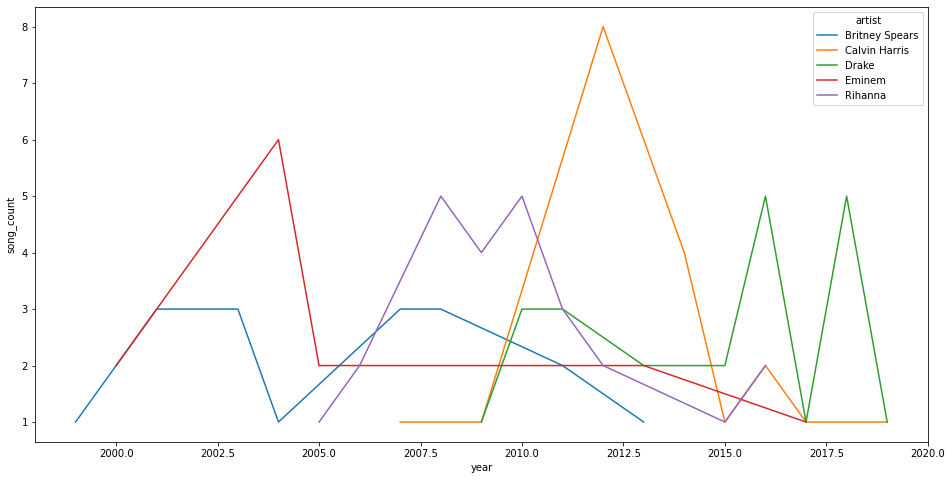

In [52]:
plt.figure(figsize=(16,8))
sns.lineplot(x='year', y='song_count', hue='artist', data=df_artist)

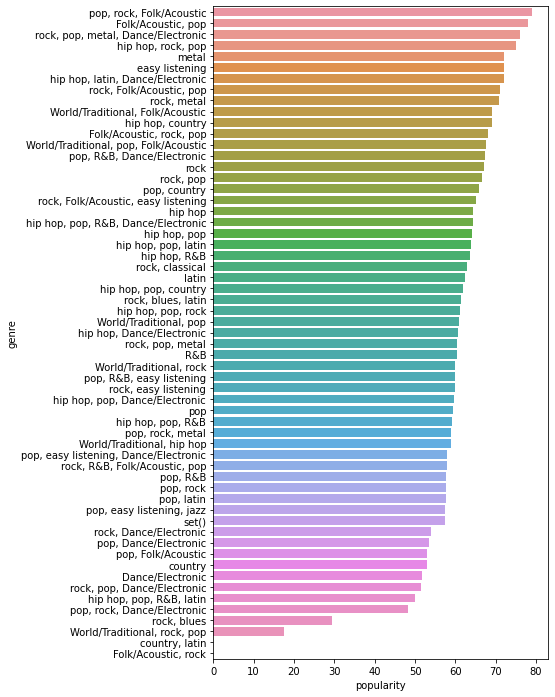

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

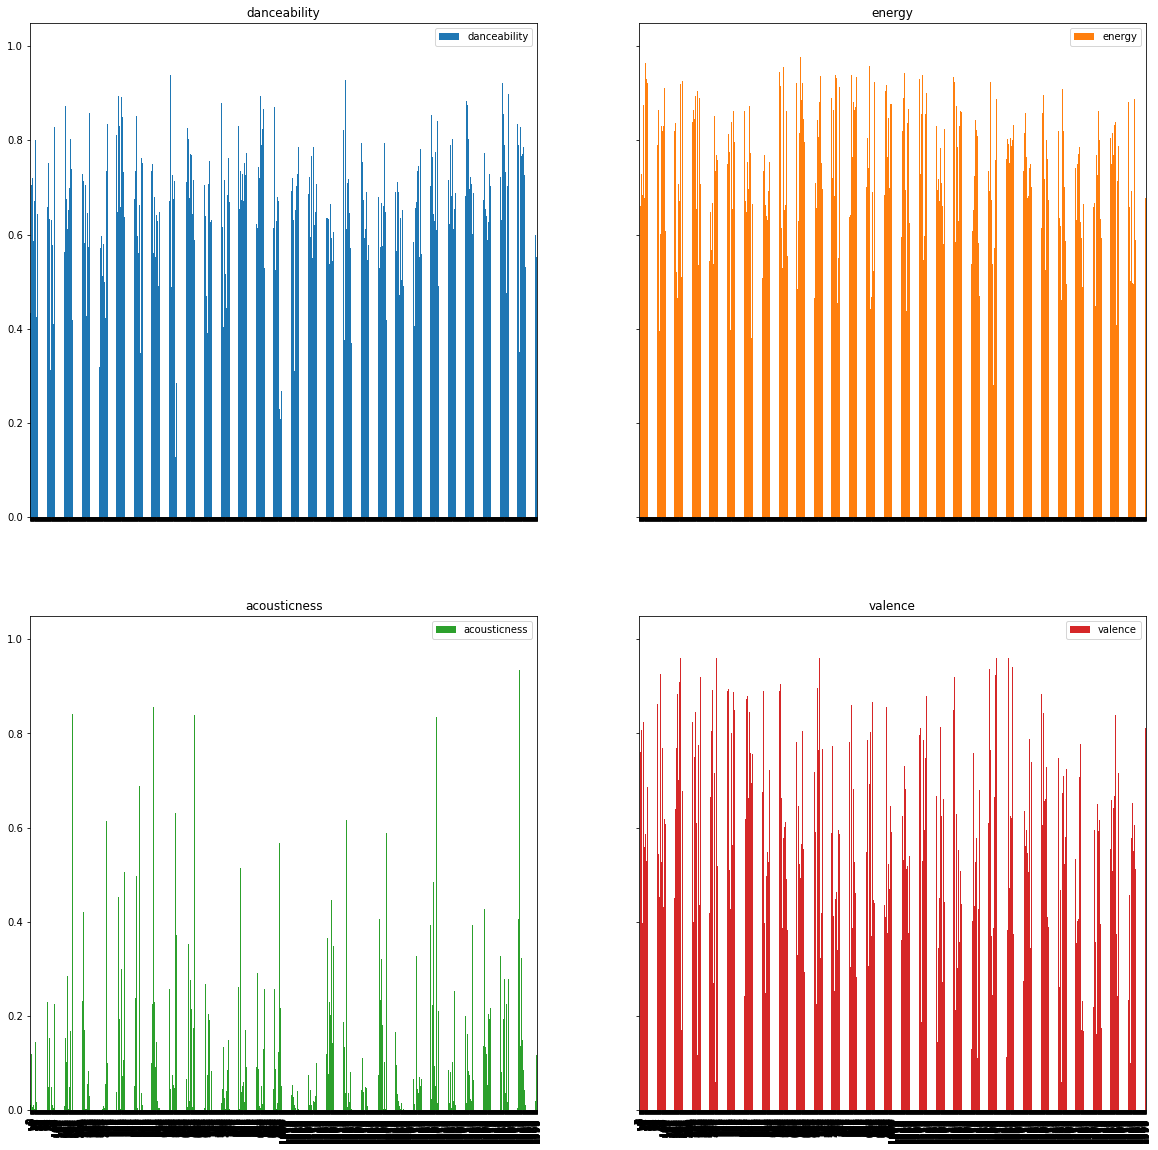

In [110]:
df_songs[['danceability','energy','acousticness', 'valence']].plot(kind='bar', subplots=True, layout=(2, 2), figsize=(20,20), sharey=True)